In [ ]:
%cd /content

# download the predictive coding repository
!git clone https://github.com/jgornet/predictive-coding-recovers-maps.git
%cd predictive-coding-recovers-maps/notebooks
!pip install -r ../requirements.txt

In [1]:
from predictive_coding.analysis import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/jamesgornet/miniconda3/envs/malmo/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/home/jamesgornet/Documents/navigation/predictive-coding-recovers-maps/notebooks/predictive_coding/trainer.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
latents = np.load('../weights/predictive-coder-circle-latents.npy').reshape(-1, 128, 8, 8)
positions = np.load('../weights/predictive-coder-circle-positions.npy').reshape(-1, 3)[:, :2]

In [3]:
latents = Latents(latents, positions, L=len(latents), offset=30, neighborhood=30, position_distance=circular_distance)

In [4]:
pc_regression = LogRegression(1, 1, latents, "Predictive coder", plt.cm.tab10(0))
pc_regression.train(latents)

/home/jamesgornet/Documents/navigation/predictive-coding-recovers-maps/notebooks/predictive_coding/analysis.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


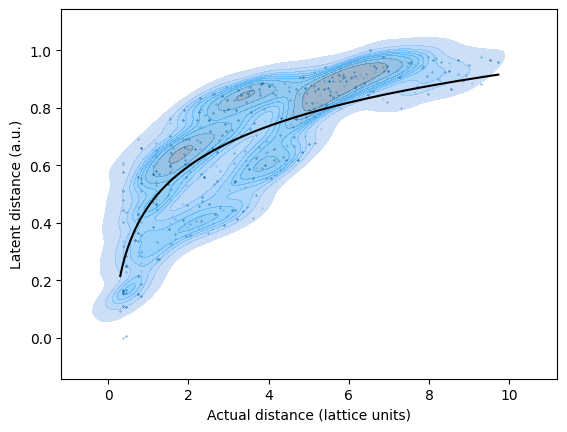

In [5]:
distribution_plot([pc_regression])
plt.show()

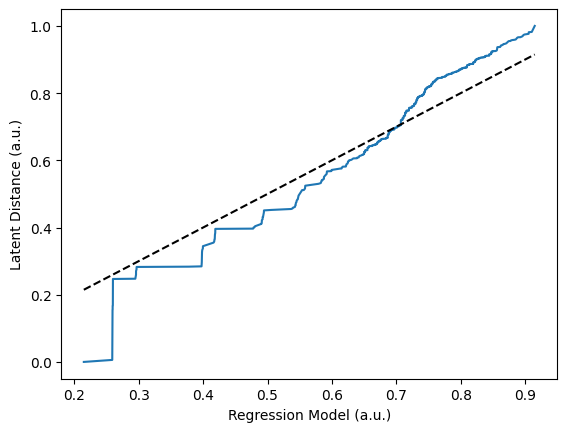

In [6]:
qq_plot([pc_regression])
plt.show()

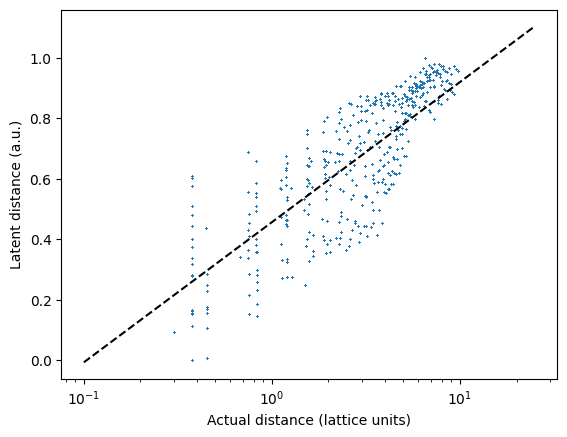

In [7]:
regression_plot([pc_regression])
plt.show()

In [8]:
position_decoder = PositionDecoder()
position_decoder.train(latents)

  0%|          | 0/4000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

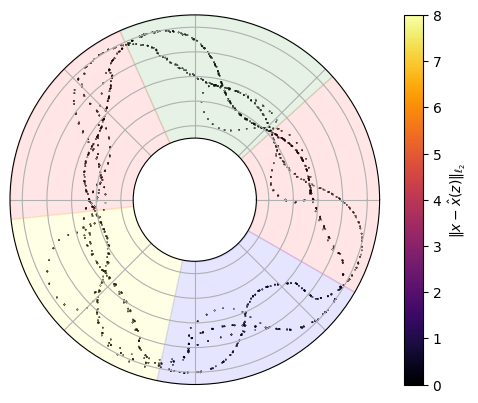

In [9]:
error_circle(position_decoder, latents)
plt.show()

In [10]:
latents = np.load('../weights/autoencoder-circle-latents.npy')
positions = np.load('../weights/autoencoder-circle-positions.npy')

In [11]:
latents = Latents(latents, positions[:, :2], L=len(latents), offset=20, neighborhood=30, position_distance=circular_distance)

In [12]:
ae_regression = LogRegression(1, 1, latents, "Auto-encoder", plt.cm.tab10(4))
ae_regression.train(latents)

/home/jamesgornet/Documents/navigation/predictive-coding-recovers-maps/notebooks/predictive_coding/analysis.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/jamesgornet/Documents/navigation/predictive-coding-recovers-maps/notebooks/predictive_coding/analysis.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


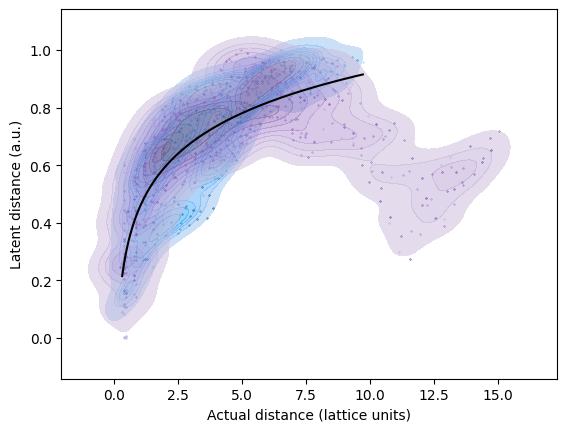

In [13]:
distribution_plot([pc_regression, ae_regression], density=0.15)
plt.show()

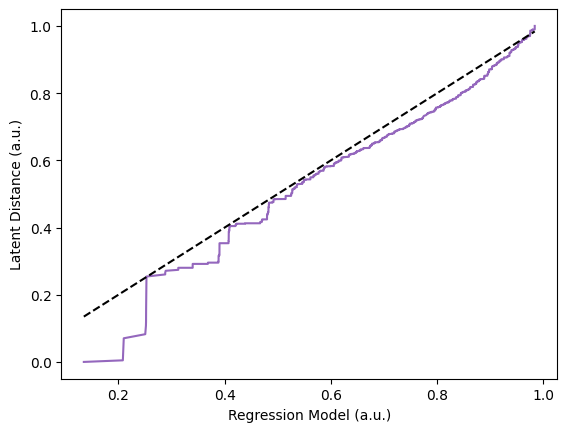

In [14]:
qq_plot([ae_regression])
plt.show()

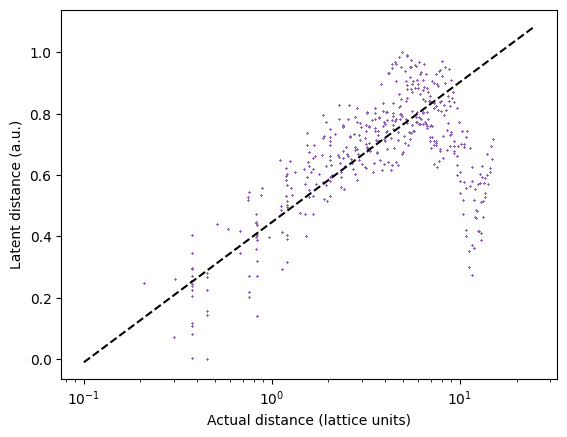

In [15]:
regression_plot([ae_regression])
plt.show()

In [16]:
position_decoder = PositionDecoder()
position_decoder.train(latents)

  0%|          | 0/4000 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

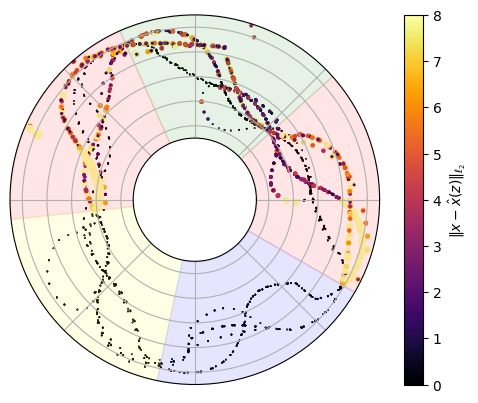

In [17]:
error_circle(position_decoder, latents)
plt.show()